# Denoising auto-encoder on fashion_mnist dataset



# Problem Statement

*The dataset is similar to MNIST but includes images of
specific clothing and accessory. The objective is to add
some noise to the images and then use an
Autoencoder to denoise those images*

 i will be performing the following tasks:

Prepare a detailed python notebook using an Autoencoder to denoise images from
MNIST Fashion Dataset with the best accuracy.

• Perform Data Visualization

• Prepare the dataset for the model (add some noise to the images)

• Build an Autoencoder model

• Train the model

• Evaluate trained model performance

• Display the Denoised Images

• Write-up a summary explaining how your program works

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
F_mnist = keras.datasets.fashion_mnist 
(X_train, _), (X_test, _) = F_mnist.load_data()

# Perform Data Visualization



Data Visualization on train data 


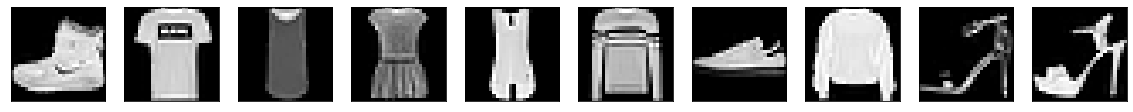

In [15]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
print("Data Visualization on train data ")
for i in range(n):
    # display original
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Prepare the dataset for the model (add some noise to the images)

In [16]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape, 'train samples') 
print(X_test.shape, 'test samples') 


(60000, 784) train samples
(10000, 784) test samples


In [18]:
# Adding noise to the train and test images
import numpy as np

trainNoise = np.random.normal(loc=0.5, scale=0.1, size=X_train.shape)
testNoise = np.random.normal(loc=0.5, scale=0.1, size=X_test.shape)
X_trainNoise = np.clip(X_train + trainNoise, 0, 1)
X_testNoise = np.clip(X_test + testNoise, 0, 1)

# Build an Autoencoder model

In [19]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [20]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [21]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [22]:

autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 0.001))
autoencoder.fit(X_trainNoise, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_testNoise, X_test))

Epoch 1/50
235/235 [==============================] - 1s 5ms/step - loss: 0.4516 - val_loss: 0.3831
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3616 - val_loss: 0.3483
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3394 - val_loss: 0.3364
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3315 - val_loss: 0.3311
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3272 - val_loss: 0.3279
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3246 - val_loss: 0.3259
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3228 - val_loss: 0.3245
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3212 - val_loss: 0.3225
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3197 - val_loss: 0.3213
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3186 - val_loss: 0.3210

# Evaluate trained model performance


***After  training the model, the loss on validation data  improves from 0.38 to 0.31***

# Display the Denoised Images

In [23]:
# encode and decode some digits
# note that we take them from the test set

encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

10 noisy images from test dataset


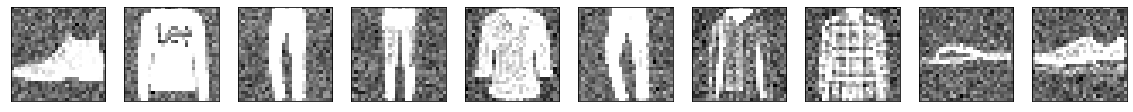

same images after Denoising


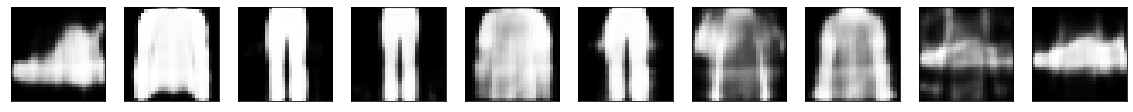

In [25]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
print("10 noisy images from test dataset")
for i in range(n):
    # display original
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_testNoise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
    
    # display reconstruction
plt.figure(figsize=(20, 4))    
print("same images after Denoising")
for i in range(n): 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Write-up a summary explaining how your program works

*I train a denoising autoencoder model on the MNIST_fashion data, i started by importing the required libraries and then load the data from the dataset of MNIST_fashion pre-loaded in the keras library, i will only need the X_train and X_test in case of an autoencoder.*

*Now, i will perform Data visualization and show the first 10 images from the training set, then i will normalise the images and perform some steps to pre-process the data such as converting the datatype to float, normalising the data between 0 and 1 and reshaping the data. i will also add some random noise to the train data as well as test data*

*Creating the autoencoder model architecture by combining the encoder layer, decoder layer and the input layer of size 786 . the architecture of the model will be input layer of size 786, the encoder layer will encode the features to a size of 32 and then decoder layer will reconstruct it to the size of 786 features.*

*Now, i will train the data with batch_size=256 and epochs = 50 and after that i will evaluate the model performance by observing the change in loss on validation data during training. Finally, i displayed the 10 images from the test set with noise in them and  then the same 1o images in denoised form, i compare the difference between these 2 set of images.*